# NFL Over/Under Prediction Algorithm
This algorithm looks at points scored and points allowed by each team facing off each week and calculates  
6 projected scores based on those past performances.  

Each projection is then compared to the over/under line given by DraftKings. If the project is over it is  
given a score of 1, under is a score of -1, and a projection that is the same as the over/under line is given  
 a score of 0.  

These scores are then summed up to give each matchup projection a final "o/u score". The higher the aboslute  
value of the score, the more confident the prediction as multiple projections have the same over/under prediction.   
If the value was positive I bet the over and if it was negative I bet the under.  

Starting in week 8, we started looking at the mean absolute error (MAE) of each projection  
(calculated in NFL_analysis_and_EDA.ipynb) and comparing it to the projection of each test. If the projection  
is greater than 1 MAE away from the over/under line, then the "MAE score" gets 1 point for each projection  
that this is true for. This score helps add confidence to the overall prediction for choosing over or under.  

For betting purposes, I chose those matchups with an o/u score that has an abosolute value of 4 or greater.  
You can see the results of each of these matchup at the end of each week.

## Inital setup (starting at end of week 5)

In [1]:
points_scored = {
    "Cardinals": [28,41,13,14,24],
    "Falcons": [10,22,17,26,36],
    "Ravens": [20,23,28,35,41],
    "Bills": [34,31,47,10,20],
    "Panthers": [10,3,36,24,10],
    "Bears": [24,13,16,24,36],
    "Bengals": [10,25,33,34,38],
    "Browns": [17,18,15,16,13],
    "Cowboys": [33,19,25,20,20],
    "Broncos": [20,6,26,10,34],
    "Lions": [26,16,20,42,"bye"],
    "Packers": [29,16,30,29,24],
    "Texans": [29,19,7,24,23],
    "Colts": [27,10,21,27,34],
    "Jaguars": [17,13,10,20,37],
    "Chiefs": [27,26,22,17,26],
    "Raiders": [10,26,22,20,18],
    "Chargers": [22,26,10,10,"bye"],
    "Rams": [20,10,27,18,19],
    "Dolphins": [20,10,3,12,15],
    "Vikings": [28,23,34,31,23],
    "Patriots": [16,20,3,13,10],
    "Saints": [47,44,12,24,13],
    "Giants": [6,18,21,15,29],
    "Jets": [19,24,24,9,17],
    "Eagles": [34,21,15,16,"bye"],
    "Steelers": [18,13,20,24,17],
    "49ers": [32,17,24,30,23],
    "Seahawks": [26,23,24,29,20],
    "Buccaneers": [37,20,7,33,30],
    "Titans": [17,17,14,31,"bye"],
    "Commanders": [20,21,38,42,34]
}

points_allowed= {
    "Cardinals": [34,10,20,42,24],
    "Falcons": [18,21,22,24,30],
    "Ravens": [27,26,25,10,38],
    "Bills": [28,10,10,35,23],
    "Panthers": [47,26,22,34,36],
    "Bears": [17,19,21,18,10],
    "Bengals": [16,26,38,24,41],
    "Browns": [33,13,21,20,34],
    "Cowboys": [17,44,28,15,17],
    "Broncos": [26,13,7,9,18],
    "Lions": [20,20,13,29,"bye"],
    "Packers": [34,10,14,31,19],
    "Texans": [27,13,34,20,20],
    "Colts": [29,16,16,24,37],
    "Jaguars": [20,18,47,24,34],
    "Chiefs": [20,25,17,10,13],
    "Raiders": [22,23,36,16,34],
    "Chargers": [10,3,20,17,"bye"],
    "Rams": [26,41,24,24,24],
    "Dolphins": [17,31,24,31,10],
    "Vikings": [6,17,7,29,17],
    "Patriots": [10,23,24,30,15],
    "Saints": [10,19,15,26,26],
    "Giants": [28,21,15,20,20],
    "Jets": [32,17,3,10,23],
    "Eagles": [29,22,12,33,"bye"],
    "Steelers": [10,6,10,27,20],
    "49ers": [19,23,27,13,24],
    "Seahawks": [20,20,3,42,29],
    "Buccaneers": [20,16,26,16,36],
    "Titans": [24,24,30,12,"bye"],
    "Commanders": [37,18,33,14,13]
}

NUM_WEEKS = len(points_scored["Bears"])
def validate_scores():
    for team in points_scored.keys():
        for i in range(NUM_WEEKS):
            if points_scored[team] == points_allowed[team] and points_scored[team] != "bye":
                print(team," week ",i+1," | ",points_scored[team],"//",points_allowed[team])
validate_scores()


# calculation functions
over_unders = {(team1,team2,over/under):[], (team3,team4,over/under):[] ...}

In [2]:
import statistics as stat
import matplotlib.pyplot as plt
TEAM1 = 0
TEAM2 = 1
LINE = 2

'''
1: avg(team1_scored) + avg(team2_scored)
2: avg(team1_allowed) + avg(team2_allowed)
3: avg(team1_scored<last n>) + avg(team2_scored<last n>)
4: avg(team1_allowed<last n>) + avg(team2_allowed<last n>)
'''
def avg_points(over_unders,points_dict,last_n=NUM_WEEKS):
    matches = list(over_unders.keys())
    matches.remove("stats")
    for match in matches:
        team1_points = [points for points in points_dict[match[TEAM1]][-1*last_n:] if points != "bye"]
        team1_points = stat.mean(team1_points)
        team2_points = [points for points in points_dict[match[TEAM2]][-1*last_n:] if points != "bye"]
        team2_points = stat.mean(team2_points)
        if (team1_points + team2_points) > match[LINE]:
            over_unders[match].append(1)
        elif (team1_points + team2_points) == match[LINE]:
            over_unders[match].append(0)
        else:
            over_unders[match].append(-1)

        over_unders["stats"][match].append(team1_points+team2_points)

'''
1:
adjust1 = (avg(team1_scored) + avg(team2_allowed))/2
adjust2 = (avg(team2_scored) + avg(team1_allowed))/2
adjust1 + adjust2

2:
adjust1 = (avg(team1_scored<last n>) + avg(team2_allowed<last n>))/2
adjust2 = (avg(team2_scored<last n>) + avg(team1_allowed<last n>))/2
adjust1 + adjust2
'''
def adjusted(over_unders,last_n=NUM_WEEKS):
    matches = list(over_unders.keys())
    matches.remove("stats")
    for match in matches:
        team1_scored = [points for points in points_scored[match[TEAM1]][-1*last_n:] if points != "bye"]
        team1_scored = stat.mean(team1_scored)

        team2_scored = [points for points in points_scored[match[TEAM2]][-1*last_n:] if points != "bye"]
        team2_scored = stat.mean(team2_scored)

        team1_allowed = [points for points in points_allowed[match[TEAM1]][-1*last_n:] if points != "bye"]
        team1_allowed = stat.mean(team1_allowed)

        team2_allowed = [points for points in points_allowed[match[TEAM2]][-1*last_n:] if points != "bye"]
        team2_allowed = stat.mean(team2_allowed)

        adjust1 = stat.mean([team1_scored,team2_allowed])
        adjust2 = stat.mean([team2_scored,team1_allowed])

        if (adjust1 + adjust2) > match[LINE]:
            over_unders[match].append(1)
        elif (adjust1 + adjust2) == match[LINE]:
            over_unders[match].append(0)
        else:
            over_unders[match].append(-1)

        over_unders["stats"][match].append(adjust1+adjust2)

def display_stats(data):
    plt.figure(figsize=(10,6))
    for i, (key, values) in enumerate(data.items()):
        # matchups on X axes
        x = [i + 1] * len(values)
        # Plot primitive calculations
        plt.scatter(x[:4], values[:4], color='black', marker='o', label='Primitive calculation' if i == 0 else "")
        # Plot adjusted calculations
        plt.scatter(x[4:], values[4:], color='blue', marker='o', label='Adjusted calculation' if i == 0 else "")
        # Plot U/O line
        plt.scatter(i + 1, key[2], color='red', marker='o', label='U/O line' if i == 0 else "")
        
    # Set X-axis labels
    plt.xticks(range(1, len(data) + 1), [f"{key[0]} vs {key[1]}" for key in data.keys()], rotation=90)

    # Set labels for the axes and plot
    plt.xlabel("Match-up")
    plt.ylabel("Values")
    plt.legend()
    plt.tight_layout()
    plt.show()


'''
Use a series of 6 tests to predict the score of each game.
Each prediction is then compared to the o/u line. +1 for over -1 for under.
Each test value is summed up and test with higher absolute values are more confidently predicted.

test1: combined points scored
test2: combined points allowed
test3: combined points scored last 3 games
test4: combined points allowed last 3 games
test5: average points scored and points allowed
test6: average points scored and points allowed last 3 games
'''
def aggregate(over_unders,LAST_N=3):
    # setup stats
    matches = list(over_unders.keys())
    over_unders["stats"] = {}
    for match in matches:
        over_unders["stats"][match] = []

    # get estimated o/u lines
    avg_points(over_unders,points_scored)
    avg_points(over_unders,points_allowed)
    avg_points(over_unders,points_scored,last_n=LAST_N)
    avg_points(over_unders,points_allowed,last_n=LAST_N)
    adjusted(over_unders)
    adjusted(over_unders,last_n=LAST_N)

    # aggregate o/u comparison scores
    agg = []
    for match in matches:
        agg.append((match,sum(over_unders[match])))
    agg = sorted(agg,key= lambda x: abs(x[1]))
    agg.reverse()
    return agg


'''
adds previous weeks scores so that the data for each week can be analyzed separately.

new_scores = [[t1_name, t2_name, t1_score, t2_score], [t3_name, t4_name, t3_score, t4_score], ...]
'''
def update_points(new_scores):
    # new_scores macros
    T1NAME = 0
    T2NAME = 1
    T1SCORE = 2
    T2SCORE = 3

    global NUM_WEEKS
    NUM_WEEKS += 1

    for game in new_scores:
        # team 1 change pf
        points_scored[game[T1NAME]].append(game[T1SCORE])
        # team 1 change pa
        points_allowed[game[T1NAME]].append(game[T2SCORE])
        # team 2 change pf
        points_scored[game[T2NAME]].append(game[T2SCORE])
        # team 2 change pa
        points_allowed[game[T2NAME]].append(game[T1SCORE])

    for team in points_scored.keys():
        if len(points_scored[team]) < NUM_WEEKS:
            points_scored[team].append("bye")
            points_allowed[team].append("bye")

    validate_scores()



# Week 6

In [3]:
over_unders6 = {
    ("Jaguars","Bears",44.5):[],
    ("Commanders","Ravens",51.5):[],
    ("Texans","Patriots",37.5):[],
    ("Browns","Eagles",42.5):[],
    ("Cardinals","Packers",47):[],
    ("Buccaneers","Saints",41.5):[],
    ("Colts","Titans",42.5):[],
    ("Chargers","Broncos",35.5):[],
    ("Steelers","Raiders",36.5):[],
    ("Falcons","Panthers",47):[],
    ("Lions","Cowboys",52):[],
    ("Bengals","Giants",47):[],
    ("Bills","Jets",41):[],
}

agg_week6 = aggregate(over_unders6)
for a in agg_week6:
    print(a)

(('Steelers', 'Raiders', 36.5), 6)
(('Colts', 'Titans', 42.5), 6)
(('Bengals', 'Giants', 47), 4)
(('Lions', 'Cowboys', 52), -4)
(('Falcons', 'Panthers', 47), 4)
(('Chargers', 'Broncos', 35.5), -4)
(('Buccaneers', 'Saints', 41.5), 4)
(('Cardinals', 'Packers', 47), 4)
(('Commanders', 'Ravens', 51.5), 2)
(('Jaguars', 'Bears', 44.5), 2)
(('Bills', 'Jets', 41), 0)
(('Browns', 'Eagles', 42.5), 0)
(('Texans', 'Patriots', 37.5), 0)


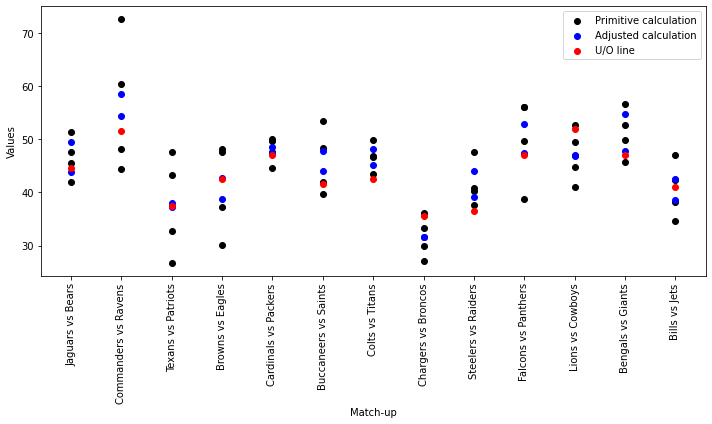

In [4]:
display_stats(over_unders6["stats"])

### Week 6 results
| Match               | ou | Result |
|---------------------|----|--------|
| Steelers vs Raiders | 6  | Won    |
| Colts vs Titans     | 6  | Lost   |
| Bengals vs Giants   | 4  | Lost   |
| Lions vs Cowboys    | -4 | Lost   |
| Falcons vs Panthers | 4  | Won    |
| Chargers vs Broncos | -4 | Lost   |
| Buccaneers vs Saints| 4  | Won    |
| Cardinals vs Packers| 4  | Push   |

This week: 3 Won, 5 Lost, 1 Push  
This season: 3 Won, 5 Lost, 1 Push



# Week 7

In [5]:
# add week 6 data
# [[t1_name, t2_name, t1_score, t2_score], [t3_name, t4_name, t3_score, t4_score], ...]
new_scores6 = [["49ers","Seahawks",36,24], ["Jaguars","Bears",16,35], ["Commanders","Ravens",23,30], 
              ["Cardinals","Packers",13,34], ["Texans","Patriots",41,21], ["Buccaneers","Saints",51,27], 
              ["Browns","Eagles",16,20], ["Colts","Titans",20,17], ["Chargers","Broncos",23,16], 
              ["Steelers","Raiders",32,13], ["Falcons","Panthers",38,20], ["Lions","Cowboys",47,9], 
              ["Bengals","Giants",17,7], ["Bills","Jets",23,20]]

update_points(new_scores6)

In [6]:
over_unders7 = {
    ("Broncos","Saints",37):[],
    ("Patriots","Jaguars",42.5):[],
    ("Lions","Vikings",51):[],
    ("Texans","Packers",47.5):[],
    ("Bengals","Browns",41.5):[],
    ("Titans","Bills",41):[],
    ("Seahawks","Falcons",51):[],
    ("Eagles","Giants",43):[],
    ("Dolphins","Colts",43.5):[],
    ("Panthers","Commanders",51.5):[],
    ("Raiders","Rams",43.5):[],
    ("Chiefs","49ers",47):[],
    ("Jets","Steelers",38):[],
    ("Ravens","Buccaneers",49.5):[],
    ("Cardinals","Chargers",43.5):[]
}

agg_week7 = aggregate(over_unders7)
for a in agg_week7:
    print(a)

(('Titans', 'Bills', 41), 6)
(('Bengals', 'Browns', 41.5), 6)
(('Broncos', 'Saints', 37), 6)
(('Cardinals', 'Chargers', 43.5), -4)
(('Ravens', 'Buccaneers', 49.5), 4)
(('Eagles', 'Giants', 43), -4)
(('Jets', 'Steelers', 38), 2)
(('Chiefs', '49ers', 47), -2)
(('Seahawks', 'Falcons', 51), 2)
(('Patriots', 'Jaguars', 42.5), 2)
(('Panthers', 'Commanders', 51.5), 1)
(('Dolphins', 'Colts', 43.5), -1)
(('Raiders', 'Rams', 43.5), 0)
(('Texans', 'Packers', 47.5), 0)
(('Lions', 'Vikings', 51), 0)


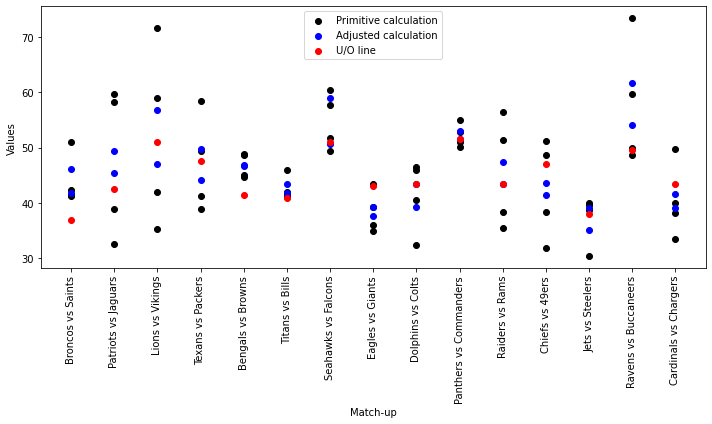

In [7]:
display_stats(over_unders7["stats"])

### Week 7 results
| Match                | ou | Result |
|----------------------|----|--------|
| Titans vs Bills      | 6  | Won    |
| Bengals vs Browns    | 6  | Lost   |
| Broncos vs Saints    | 6  | Won    |
| Cardinals vs Chargers| -4 | Won    |
| Ravens vs Buccaneers | 4  | Won    |
| Eagles vs Giants     | -4 | Won    |


This week: 5 Won, 1 Lost, 0 Push  
This season: 8 Won, 6 Lost, 1 Push

# Week 8

In [8]:
# add week 7 data
# [[t1_name, t2_name, t1_score, t2_score], [t3_name, t4_name, t3_score, t4_score], ...]
new_scores7 = [["Broncos","Saints",33,10], ["Patriots","Jaguars",16,32], ["Seahawks","Falcons",34,14], 
              ["Titans","Bills",10,34], ["Bengals","Browns",21,14], ["Texans","Packers",22,24], 
              ["Dolphins","Colts",10,16], ["Lions","Vikings",31,29], ["Eagles","Giants",28,3], 
              ["Raiders","Rams",15,20], ["Panthers","Commanders",7,40], ["Chiefs","49ers",28,18], 
              ["Jets","Steelers",15,37], ["Ravens","Buccaneers",41,31], ["Chargers","Cardinals",15,17]]

update_points(new_scores7)

In [9]:
over_unders8 = {
    ("Vikings","Rams",48):[],
    ("Titans","Lions",45):[],
    ("Packers","Jaguars",49):[],
    ("Ravens","Browns",44.5):[],
    ("Colts","Texans",46):[],
    ("Jets","Patriots",41.5):[],
    ("Eagles","Bengals",48):[],
    ("Falcons","Buccaneers",46):[],
    ("Cardinals","Dolphins",46.5):[],
    ("Bills","Seahawks",46.5):[],
    ("Saints","Chargers",40.5):[],
    ("Panthers","Broncos",42.5):[],
    ("Chiefs","Raiders",41.5):[],
    ("Bears","Commanders",43.5):[],
    ("Cowboys","49ers",46):[],
    ("Giants","Steelers",36.5):[]
}

agg_week8 = aggregate(over_unders8)
for a in agg_week8:
    print(a)

(('Giants', 'Steelers', 36.5), 6)
(('Falcons', 'Buccaneers', 46), 6)
(('Ravens', 'Browns', 44.5), 6)
(('Panthers', 'Broncos', 42.5), 4)
(('Cardinals', 'Dolphins', 46.5), -4)
(('Packers', 'Jaguars', 49), 4)
(('Titans', 'Lions', 45), 4)
(('Vikings', 'Rams', 48), -4)
(('Cowboys', '49ers', 46), 2)
(('Bears', 'Commanders', 43.5), 2)
(('Chiefs', 'Raiders', 41.5), 2)
(('Bills', 'Seahawks', 46.5), 2)
(('Eagles', 'Bengals', 48), -2)
(('Saints', 'Chargers', 40.5), 0)
(('Jets', 'Patriots', 41.5), 0)
(('Colts', 'Texans', 46), 0)


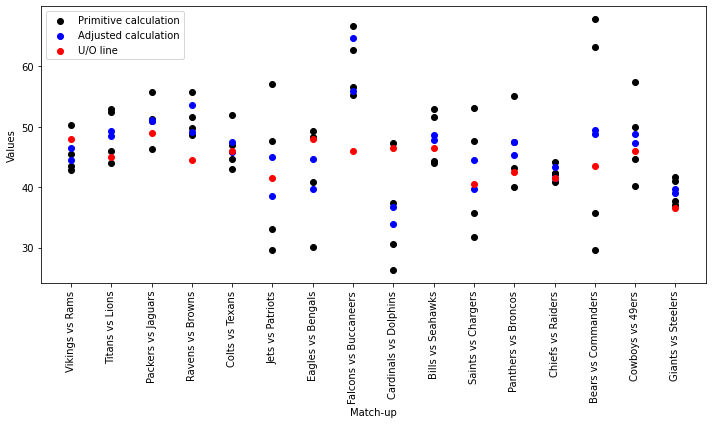

In [10]:
display_stats(over_unders8["stats"])

In [11]:
'''
compare the difference between the betline and the predicted total score with the Mean Absolute Error (MAE) 
to determine high confidence on betting lines.
'''
def compare_MAE(over_under_stats):
    t1_mae = 11.45
    t2_mae = 12.05
    t3_mae = 12.51
    t4_mae = 13.05
    t5_mae = 10.97
    t6_mae = 11.44
    conf_list = []
    for match in over_under_stats:
        comp1 = abs(over_under_stats[match][0] - match[2]) > t1_mae
        comp2 = abs(over_under_stats[match][1] - match[2]) > t2_mae
        comp3 = abs(over_under_stats[match][2] - match[2]) > t3_mae
        comp4 = abs(over_under_stats[match][3] - match[2]) > t4_mae
        comp5 = abs(over_under_stats[match][4] - match[2]) > t5_mae
        comp6 = abs(over_under_stats[match][5] - match[2]) > t6_mae
        conf_list.append((match,[comp1,comp2,comp3,comp4,comp5,comp6].count(True)))
    conf_list = sorted(conf_list,key= lambda x: abs(x[1]))
    conf_list.reverse()
    return conf_list  

'''
Function for combining MAE confidence with betting aggregation
'''
def combine_tuple_lists(list1, list2):
    assert len(list1) == len(list2)

    combined_list = []
    dict_list2 = {item[0]: item[1] for item in list2}
    
    for item1 in list1:
        key = item1[0]
        if key in dict_list2:
            combined_tuple = (key, item1[1], dict_list2[key])
            combined_list.append(combined_tuple)
    
    assert len(list1) == len(combined_list)

    combined_list = sorted(combined_list,key= lambda x: (abs(x[2]),x[1]), reverse=True)

    for c in combined_list:
        print(c[0][0]," vs ",c[0][1])
        print("o/u score: ",c[2])
        print("mae score: ",c[1])
        print("---------")

In [12]:
conf_list8 = compare_MAE(over_unders8['stats'])
combine_tuple_lists(conf_list8,agg_week8)

Falcons  vs  Buccaneers
o/u score:  6
mae score:  3
---------
Giants  vs  Steelers
o/u score:  6
mae score:  0
---------
Ravens  vs  Browns
o/u score:  6
mae score:  0
---------
Cardinals  vs  Dolphins
o/u score:  -4
mae score:  3
---------
Panthers  vs  Broncos
o/u score:  4
mae score:  0
---------
Packers  vs  Jaguars
o/u score:  4
mae score:  0
---------
Titans  vs  Lions
o/u score:  4
mae score:  0
---------
Vikings  vs  Rams
o/u score:  -4
mae score:  0
---------
Bears  vs  Commanders
o/u score:  2
mae score:  3
---------
Eagles  vs  Bengals
o/u score:  -2
mae score:  1
---------
Cowboys  vs  49ers
o/u score:  2
mae score:  0
---------
Chiefs  vs  Raiders
o/u score:  2
mae score:  0
---------
Bills  vs  Seahawks
o/u score:  2
mae score:  0
---------
Jets  vs  Patriots
o/u score:  0
mae score:  2
---------
Saints  vs  Chargers
o/u score:  0
mae score:  0
---------
Colts  vs  Texans
o/u score:  0
mae score:  0
---------


### Week 8 results
| Match                | ou | MAE | Result |
|----------------------|----|-----|--------|
| Falcons vs Buccaneers| 6  | 3   | Won    |
| Giants vs Steelers   | 6  | 0   | Won    |
| Ravens vs Browns     | 6  | 0   | Won    |
| Cardinals vs Dolphins| -4 | 3   | Lost   |
| Panthers vs Broncos  | 4  | 0   | Push   |
| Packers vs Jaguars   | 4  | 0   | Won    |
| Titans vs Lions      | 4  | 0   | Won    |
| Vikings vs Rams      | -4 | 0   | Lost   |

This week: 5 Won, 2 Lost, 1 Push  
This season: 13 Won, 8 Lost, 2 Push

# Week 9

In [13]:
# add week 8 data
# [[t1_name, t2_name, t1_score, t2_score], [t3_name, t4_name, t3_score, t4_score], ...]
new_scores8 = [["Vikings","Rams",20,30], ["Eagles","Bengals",37,17], ["Ravens","Browns",24,29], 
              ["Titans","Lions",14,52], ["Colts","Texans",20,23], ["Packers","Jaguars",30,27], 
              ["Cardinals","Dolphins",28,27], ["Jets","Patriots",22,25], ["Falcons","Buccaneers",31,26], 
              ["Saints","Chargers",8,26], ["Bills","Seahawks",31,10], ["Panthers","Broncos",14,28], 
              ["Chiefs","Raiders",27,20], ["Bears","Commanders",15,18], ["Cowboys","49ers",24,30], ["Giants","Steelers",18,26]]

update_points(new_scores8)

In [14]:
over_unders9 = {
    ("Texans","Jets",42):[],
    ("Broncos","Ravens",45.5):[],
    ("Dolphins","Bills",49):[],
    ("Commanders","Giants",43.5):[],
    ("Raiders","Bengals",46.5):[],
    ("Chargers","Browns",43):[],
    ("Cowboys","Falcons",52):[],
    ("Patriots","Titans",38):[],
    ("Saints","Panthers",43.5):[],
    ("Jaguars","Eagles",45.5):[],
    ("Bears","Cardinals",44.5):[],
    ("Lions","Packers",48.5):[],
    ("Rams","Seahawks",48):[],
    ("Colts","Vikings",46.5):[],
    ("Buccaneers","Chiefs",45.5):[]}

agg_week9 = aggregate(over_unders9)
conf_list9 = compare_MAE(over_unders9['stats'])
combine_tuple_lists(conf_list9,agg_week9)

Dolphins  vs  Bills
o/u score:  -6
mae score:  1
---------
Chargers  vs  Browns
o/u score:  -6
mae score:  0
---------
Texans  vs  Jets
o/u score:  6
mae score:  0
---------
Buccaneers  vs  Chiefs
o/u score:  4
mae score:  3
---------
Commanders  vs  Giants
o/u score:  -4
mae score:  0
---------
Raiders  vs  Bengals
o/u score:  -3
mae score:  0
---------
Saints  vs  Panthers
o/u score:  2
mae score:  4
---------
Patriots  vs  Titans
o/u score:  2
mae score:  3
---------
Lions  vs  Packers
o/u score:  2
mae score:  2
---------
Broncos  vs  Ravens
o/u score:  2
mae score:  1
---------
Colts  vs  Vikings
o/u score:  2
mae score:  0
---------
Rams  vs  Seahawks
o/u score:  -2
mae score:  0
---------
Bears  vs  Cardinals
o/u score:  -2
mae score:  0
---------
Jaguars  vs  Eagles
o/u score:  2
mae score:  0
---------
Cowboys  vs  Falcons
o/u score:  0
mae score:  1
---------


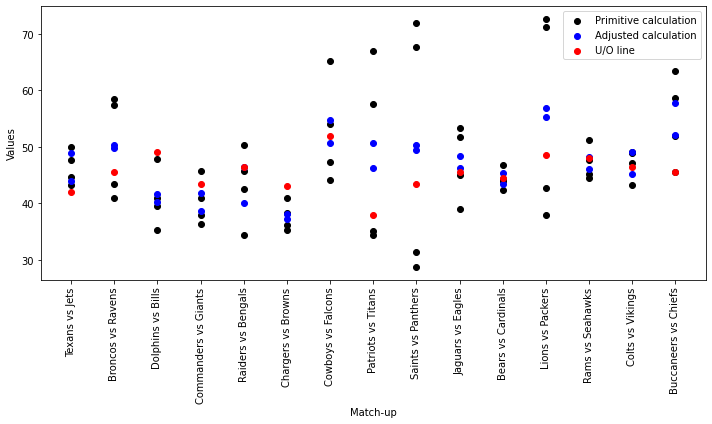

In [15]:
display_stats(over_unders9["stats"])

### Week 9 results
| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Dolphins vs Bills     | -6  | 1   | Lost   |
| Chargers vs Browns    | -6  | 0   | Won    |
| Texans vs Jets        | 6   | 0   | Lost   |
| Buccaneers vs Chiefs  | 4   | 3   | Won    |
| Commanders vs Giants  | -4  | 0   | Lost   |

This week: 2 Won, 3 Lost, 0 Push  
This season: 15 Won, 11 Lost, 2 Push

# Week 10

In [16]:
# add week 9 data
new_scores9 = [
    ["Texans", "Jets", 13, 21],
    ["Cowboys", "Falcons", 21, 27],
    ["Dolphins", "Bills", 27, 30],
    ["Raiders", "Bengals", 24, 41],
    ["Chargers", "Browns", 27, 10],
    ["Patriots", "Titans", 17, 20],
    ["Commanders", "Giants", 27, 22],
    ["Saints", "Panthers", 22, 23],
    ["Broncos", "Ravens", 10, 41],
    ["Jaguars", "Eagles", 23, 28],
    ["Bears", "Cardinals", 9, 29],
    ["Lions", "Packers", 24, 14],
    ["Rams", "Seahawks", 26, 20],
    ["Colts", "Vikings", 13, 21],
    ["Buccaneers", "Chiefs", 24, 30]
]
update_points(new_scores9)

In [17]:
over_unders10 = {
    ("Bengals", "Ravens", 53): [],
    ("Giants", "Panthers", 41.5): [],
    ("Bills", "Colts", 46): [],
    ("Falcons", "Saints", 46.5): [],
    ("Broncos", "Chiefs", 41.5): [],
    ("Steelers", "Commanders", 46): [],
    ("Vikings", "Jaguars", 47.5): [],
    ("Patriots", "Bears", 39.5): [],
    ("49ers", "Buccaneers", 50): [],
    ("Titans", "Chargers", 38): [],
    ("Eagles", "Cowboys", 42): [],
    ("Jets", "Cardinals", 46): [],
    ("Lions", "Texans", 49.5): [],
    ("Dolphins", "Rams", 51): []
}


agg_week10 = aggregate(over_unders10)
conf_list10 = compare_MAE(over_unders10['stats'])
combine_tuple_lists(conf_list10,agg_week10)

Dolphins  vs  Rams
o/u score:  -6
mae score:  0
---------
Eagles  vs  Cowboys
o/u score:  6
mae score:  0
---------
49ers  vs  Buccaneers
o/u score:  6
mae score:  0
---------
Vikings  vs  Jaguars
o/u score:  6
mae score:  0
---------
Jets  vs  Cardinals
o/u score:  -5
mae score:  0
---------
Patriots  vs  Bears
o/u score:  4
mae score:  0
---------
Broncos  vs  Chiefs
o/u score:  4
mae score:  0
---------
Titans  vs  Chargers
o/u score:  3
mae score:  0
---------
Steelers  vs  Commanders
o/u score:  -2
mae score:  3
---------
Giants  vs  Panthers
o/u score:  2
mae score:  2
---------
Bills  vs  Colts
o/u score:  -2
mae score:  0
---------
Bengals  vs  Ravens
o/u score:  2
mae score:  0
---------
Lions  vs  Texans
o/u score:  0
mae score:  1
---------
Falcons  vs  Saints
o/u score:  0
mae score:  0
---------


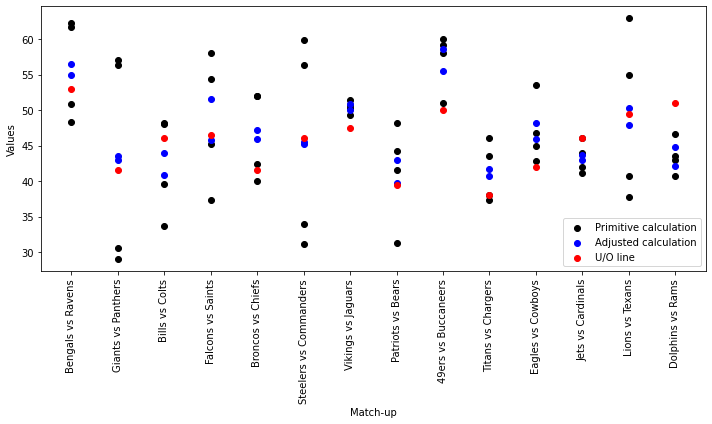

In [18]:
display_stats(over_unders10["stats"])

### Week 10 results
| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Dolphins vs Rams      | -6  | 0   | Won    |
| Eagles vs Cowboys     | 6   | 0   | Lost   |
| 49ers vs Buccaneers   | 6   | 0   | Lost   |
| Vikings vs Jaguars    | 6   | 0   | Lost   |
| Jets vs Cardinals     | -5  | 0   | Won    |
| Patriots vs Bears     | 4   | 0   | Lost   |
| Broncos vs Chiefs     | 4   | 0   | Lost   |

This week: 2 Won, 5 Lost, 0 Push  
This season: 17 Won, 16 Lost, 2 Push


# Week 11

In [19]:
new_scores10 = [
    ["Bengals", "Ravens", 34, 35],
    ["Giants", "Panthers", 17, 20],
    ["Patriots", "Bears", 19, 3],
    ["Bills", "Colts", 30, 20],
    ["Broncos", "Chiefs", 14, 16],
    ["Falcons", "Saints", 17, 20],
    ["49ers", "Buccaneers", 23, 20],
    ["Steelers", "Commanders", 28, 27],
    ["Vikings", "Jaguars", 12, 7],
    ["Titans", "Chargers", 17, 27],
    ["Eagles", "Cowboys", 34, 6],
    ["Jets", "Cardinals", 6, 31],
    ["Lions", "Texans", 26, 23],
    ["Dolphins", "Rams", 23, 15]
]
update_points(new_scores10)

In [20]:
over_unders11 = {
    ("Commanders", "Eagles", 48.5): [],
    ("Packers", "Bears", 41): [],
    ("Vikings", "Titans", 39.5): [],
    ("Ravens", "Steelers", 48.5): [],
    ("Jaguars", "Lions", 47): [],
    ("Raiders", "Dolphins", 44): [],
    ("Rams", "Patriots", 44): [],
    ("Colts", "Jets", 44): [],
    ("Browns", "Saints", 44.5): [],
    ("Falcons", "Broncos", 44): [],
    ("Seahawks", "49ers", 49.5): [],
    ("Chiefs", "Bills", 46): [],
    ("Bengals", "Chargers", 47): [],
    ("Texans", "Cowboys", 42): [],
}

agg_week11 = aggregate(over_unders11)
conf_list11 = compare_MAE(over_unders11['stats'])
combine_tuple_lists(conf_list11,agg_week11)

Rams  vs  Patriots
o/u score:  -5
mae score:  0
---------
Raiders  vs  Dolphins
o/u score:  4
mae score:  1
---------
Falcons  vs  Broncos
o/u score:  4
mae score:  0
---------
Texans  vs  Cowboys
o/u score:  2
mae score:  1
---------
Ravens  vs  Steelers
o/u score:  2
mae score:  1
---------
Commanders  vs  Eagles
o/u score:  -2
mae score:  1
---------
Browns  vs  Saints
o/u score:  -2
mae score:  0
---------
Colts  vs  Jets
o/u score:  -2
mae score:  0
---------
Vikings  vs  Titans
o/u score:  2
mae score:  0
---------
Packers  vs  Bears
o/u score:  1
mae score:  0
---------
Bengals  vs  Chargers
o/u score:  0
mae score:  0
---------
Chiefs  vs  Bills
o/u score:  0
mae score:  0
---------
Seahawks  vs  49ers
o/u score:  0
mae score:  0
---------
Jaguars  vs  Lions
o/u score:  0
mae score:  0
---------


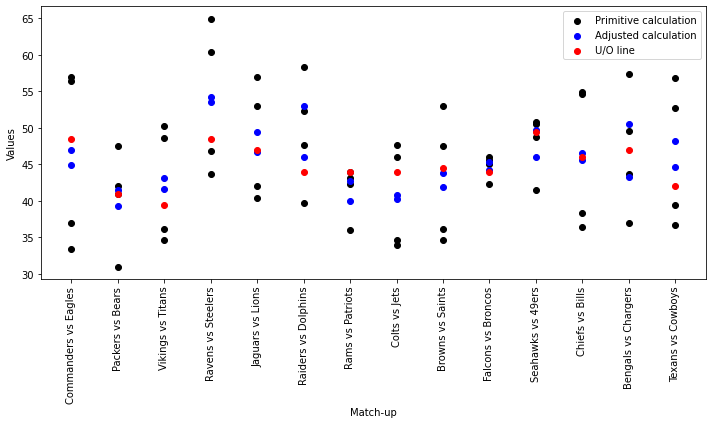

In [21]:
display_stats(over_unders11["stats"])

### Week 11 results

| Match                | ou  | MAE | Result |
|----------------------|-----|-----|--------|
| Rams vs Patriots     | -5  | 0   | Lost   |
| Raiders vs Dolphins  | 4   | 1   | Won    |
| Falcons vs Broncos   | 4   | 0   | Push   |

This week: 1 Won, 1 Lost, 1 Push  
This season: 18 Won, 17 Lost, 3 Push

# Week 12

In [22]:
new_scores11 = [
    ["Commanders", "Eagles", 18, 26],
    ["Packers", "Bears", 20, 19],
    ["Jaguars", "Lions", 6, 52],
    ["Vikings", "Titans", 23, 13],
    ["Raiders", "Dolphins", 19, 34],
    ["Rams", "Patriots", 28, 22],
    ["Browns", "Saints", 14, 35],
    ["Colts", "Jets", 28, 27],
    ["Ravens", "Steelers", 16, 18],
    ["Falcons", "Broncos", 6, 38],
    ["Seahawks", "49ers", 20, 17],
    ["Chiefs", "Bills", 21, 30],
    ["Bengals", "Chargers", 27, 34],
    ["Texans", "Cowboys", 34, 10]
]
update_points(new_scores11)

In [23]:
over_unders12 = {
    ("Steelers", "Browns", 36.5): [],
    ("Chiefs", "Panthers", 41): [],
    ("Lions", "Colts", 50.5): [],
    ("Buccaneers", "Giants", 41): [],
    ("Patriots", "Dolphins", 46.5): [],
    ("Vikings", "Bears", 39.5): [],
    ("Titans", "Texans", 40.5): [],
    ("Cowboys", "Commanders", 45.5): [],
    ("Broncos", "Raiders", 41): [],
    ("49ers", "Packers", 47.5): [],
    ("Cardinals", "Seahawks", 47.5): [],
    ("Eagles", "Rams", 49): [],
    ("Ravens", "Chargers", 51): []
}

agg_week12 = aggregate(over_unders12)
conf_list12 = compare_MAE(over_unders12['stats'])
combine_tuple_lists(conf_list12,agg_week12)

Broncos  vs  Raiders
o/u score:  6
mae score:  1
---------
49ers  vs  Packers
o/u score:  -6
mae score:  0
---------
Cardinals  vs  Seahawks
o/u score:  -4
mae score:  1
---------
Buccaneers  vs  Giants
o/u score:  4
mae score:  1
---------
Steelers  vs  Browns
o/u score:  4
mae score:  1
---------
Vikings  vs  Bears
o/u score:  -4
mae score:  0
---------
Patriots  vs  Dolphins
o/u score:  -4
mae score:  0
---------
Chiefs  vs  Panthers
o/u score:  4
mae score:  0
---------
Eagles  vs  Rams
o/u score:  -2
mae score:  1
---------
Ravens  vs  Chargers
o/u score:  -2
mae score:  0
---------
Cowboys  vs  Commanders
o/u score:  2
mae score:  0
---------
Titans  vs  Texans
o/u score:  2
mae score:  0
---------
Lions  vs  Colts
o/u score:  -2
mae score:  0
---------


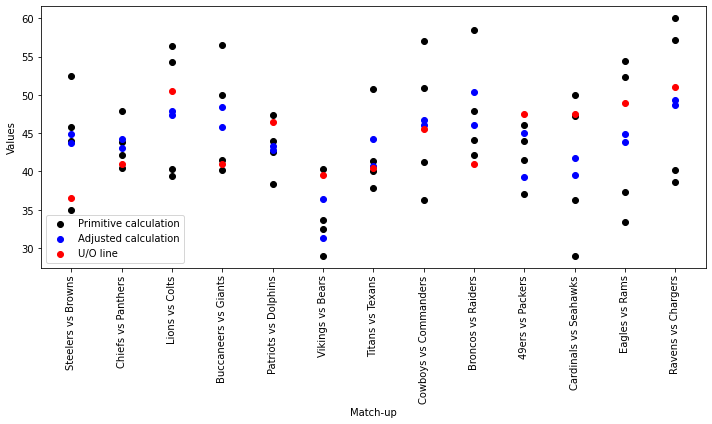

In [24]:
display_stats(over_unders12["stats"])

### Week 12 results

| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Broncos vs Raiders    | 6   | 1   | Won    |
| 49ers vs Packers      | -6  | 0   | Lost   |
| Cardinals vs Seahawks | -4  | 1   | Won    |
| Buccaneers vs Giants  | 4   | 1   | Won    |
| Steelers vs Browns    | 4   | 1   | Won    |
| Vikings vs Bears      | -4  | 0   | Lost   |
| Patriots vs Dolphins  | -4  | 0   | Lost   |
| Chiefs vs Panthers    | 4   | 0   | Won    |

This week: 5 Won, 3 Lost, 0 Push  
This season: 23 Won, 20 Lost, 3 Push

# Week 13

In [25]:
new_scores12 = [
    ["Steelers", "Browns", 19, 24],
    ["Chiefs", "Panthers", 30, 27],
    ["Vikings", "Bears", 30, 27],
    ["Titans", "Texans", 32, 27],
    ["Lions", "Colts", 24, 6],
    ["Patriots", "Dolphins", 15, 34],
    ["Buccaneers", "Giants", 30, 7],
    ["Cowboys", "Commanders", 34, 26],
    ["Broncos", "Raiders", 29, 19],
    ["49ers", "Packers", 10, 38],
    ["Cardinals", "Seahawks", 6, 16],
    ["Eagles", "Rams", 37, 20],
    ["Ravens", "Chargers", 30, 23]
]
update_points(new_scores12)

In [26]:
over_unders13 = {
    ('Bears', 'Lions', 47.5): [],
    ('Giants', 'Cowboys', 37.5): [],
    ('Dolphins', 'Packers', 47.5): [],
    ('Raiders', 'Chiefs', 42.5): [],
    ('Texans', 'Jaguars', 44.0): [],
    ('Titans', 'Commanders', 44.5): [],
    ('Seahawks', 'Jets', 42.0): [],
    ('Cardinals', 'Vikings', 45.0): [],
    ('Steelers', 'Bengals', 47.5): [],
    ('Chargers', 'Falcons', 47.5): [],
    ('Colts', 'Patriots', 42.5): [],
    ('Buccaneers', 'Panthers', 46.5): [],
    ('Rams', 'Saints', 49.5): [],
    ('Eagles', 'Ravens', 50.5): [],
    ('49ers', 'Bills', 44.5): [],
    ('Browns', 'Broncos', 41.5): []
}

agg_week13 = aggregate(over_unders13)
conf_list13 = compare_MAE(over_unders13['stats'])
combine_tuple_lists(conf_list13,agg_week13)

Cardinals  vs  Vikings
o/u score:  -6
mae score:  3
---------
49ers  vs  Bills
o/u score:  6
mae score:  0
---------
Rams  vs  Saints
o/u score:  -6
mae score:  0
---------
Steelers  vs  Bengals
o/u score:  6
mae score:  0
---------
Raiders  vs  Chiefs
o/u score:  4
mae score:  1
---------
Browns  vs  Broncos
o/u score:  4
mae score:  0
---------
Seahawks  vs  Jets
o/u score:  -4
mae score:  0
---------
Giants  vs  Cowboys
o/u score:  2
mae score:  2
---------
Chargers  vs  Falcons
o/u score:  -2
mae score:  0
---------
Titans  vs  Commanders
o/u score:  2
mae score:  0
---------
Texans  vs  Jaguars
o/u score:  2
mae score:  0
---------
Bears  vs  Lions
o/u score:  -2
mae score:  0
---------
Buccaneers  vs  Panthers
o/u score:  -1
mae score:  0
---------
Dolphins  vs  Packers
o/u score:  0
mae score:  1
---------
Eagles  vs  Ravens
o/u score:  0
mae score:  0
---------
Colts  vs  Patriots
o/u score:  0
mae score:  0
---------


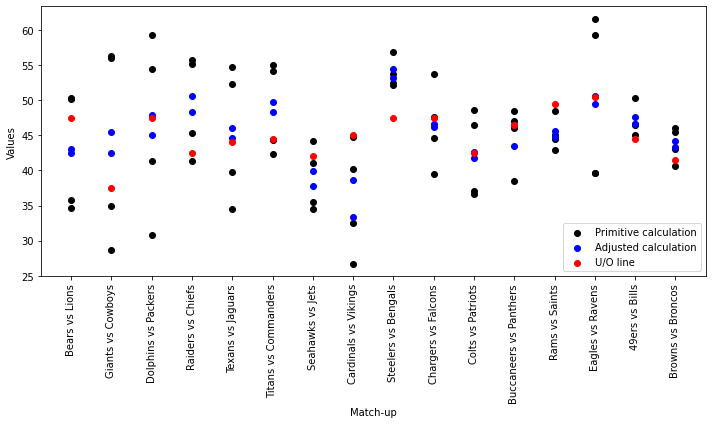

In [27]:
display_stats(over_unders13["stats"])

### Week 13 results

| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Cardinals vs Vikings  | -6  | 3   | Push   |
| 49ers vs Bills        | 6   | 0   | Won    |
| Rams vs Saints        | -6  | 0   | Won    |
| Steelers vs Bengals   | 6   | 0   | Won    |
| Raiders vs Chiefs     | 4   | 1   | Lost   |
| Browns vs Broncos     | 4   | 0   | Won    |
| Seahawks vs Jets      | -4  | 0   | Lost   |

This week: 4 Won, 2 Lost, 1 Push  
This season: 27 Won, 22 Lost, 4 Push

# Week 14

In [28]:
new_scores13 = [
	['Lions', 'Bears', 23, 20],
	['Cowboys', 'Giants', 27, 20],
	['Packers', 'Dolphins', 30, 17],
	['Chiefs', 'Raiders', 19, 17],
	['Falcons', 'Chargers', 13, 17],
	['Bengals', 'Steelers', 38, 44],
	['Vikings', 'Cardinals', 23, 22],
	['Patriots', 'Colts', 24, 25],
	['Jets', 'Seahawks', 21, 26],
	['Commanders', 'Titans', 42, 19],
	['Jaguars', 'Texans', 20, 23],
	['Saints', 'Rams', 14, 21],
	['Panthers', 'Buccaneers', 23, 26],
	['Ravens', 'Eagles', 19, 24],
	['Bills', '49ers', 35, 10],
	['Broncos', 'Browns', 41, 32]
]

update_points(new_scores13)

In [29]:
over_unders14 = {
	('Packers', 'Lions', 51.0): [],
	('Panthers', 'Eagles', 46.0): [],
	('Falcons', 'Vikings', 45.5): [],
	('Raiders', 'Buccaneers', 46.0): [],
	('Jets', 'Dolphins', 46.0): [],
	('Browns', 'Steelers', 43.0): [],
	('Saints', 'Giants', 40.5): [],
	('Jaguars', 'Titans', 39.5): [],
	('Seahawks', 'Cardinals', 44.5): [],
	('Bills', 'Rams', 49.0): [],
	('Bears', '49ers', 44.0): [],
	('Chargers', 'Chiefs', 43.0): [],
	('Bengals', 'Cowboys', 50.5): []
}

agg_week14 = aggregate(over_unders14)
conf_list14 = compare_MAE(over_unders14['stats'])
combine_tuple_lists(conf_list14,agg_week14)


Browns  vs  Steelers
o/u score:  6
mae score:  2
---------
Bengals  vs  Cowboys
o/u score:  6
mae score:  1
---------
Seahawks  vs  Cardinals
o/u score:  -6
mae score:  1
---------
Chargers  vs  Chiefs
o/u score:  4
mae score:  0
---------
Jets  vs  Dolphins
o/u score:  4
mae score:  0
---------
Falcons  vs  Vikings
o/u score:  -4
mae score:  0
---------
Panthers  vs  Eagles
o/u score:  4
mae score:  0
---------
Jaguars  vs  Titans
o/u score:  2
mae score:  3
---------
Packers  vs  Lions
o/u score:  -2
mae score:  2
---------
Bills  vs  Rams
o/u score:  -2
mae score:  0
---------
Saints  vs  Giants
o/u score:  2
mae score:  0
---------
Bears  vs  49ers
o/u score:  0
mae score:  1
---------
Raiders  vs  Buccaneers
o/u score:  0
mae score:  0
---------


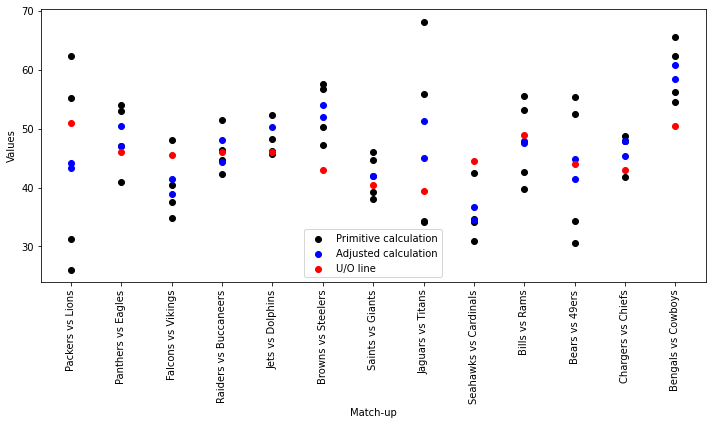

In [30]:
display_stats(over_unders14["stats"])

### Week 14 results

| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Browns vs Stelers     |  6  | 2   | Lost   |
| Bengals vs Cowboys    |  6  | 1   | Lost   |
| Seahawks vs Cardinals | -6  | 1   | Lost   |
| Chargers vs Chiefs    |  4  | 0   | Lost   |
| Jets vs Dolphins      |  4  | 0   | Won    |
| Falcons vs Vikings    | -4  | 0   | Lost   |
| Panthers vs Eagles    |  4  | 0   | Lost   |

This week: 1 Won, 6 Lost, 0 Push  
This season: 28 Won, 28 Lost, 4 Push

# Week 15

In [31]:
new_scores14 = [
	['Lions', 'Packers', 34, 31],
	['Titans', 'Jaguars', 6, 10],
	['Dolphins', 'Jets', 32, 26],
	['Vikings', 'Falcons', 42, 21],
	['Giants', 'Saints', 11, 14],
	['Eagles', 'Panthers', 22, 16],
	['Steelers', 'Browns', 27, 14],
	['Buccaneers', 'Raiders', 28, 13],
	['Cardinals', 'Seahawks', 18, 30],
	['Rams', 'Bills', 44, 42],
	['49ers', 'Bears', 38, 13],
	['Chiefs', 'Chargers', 19, 17],
	['Cowboys', 'Bengals', 20, 27]
]
update_points(new_scores14)

In [32]:
over_unders15 = {
	('Rams', '49ers', 48.5): [],
	('Ravens', 'Giants', 42.5): [],
	('Commanders', 'Saints', 43.5): [],
	('Chiefs', 'Browns', 44.0): [],
	('Bengals', 'Titans', 46.5): [],
	('Dolphins', 'Texans', 47.0): [],
	('Jets', 'Jaguars', 40.5): [],
	('Cowboys', 'Panthers', 43.0): [],
	('Colts', 'Broncos', 44.0): [],
	('Steelers', 'Eagles', 42.5): [],
	('Bills', 'Lions', 54.5): [],
	('Patriots', 'Cardinals', 46.0): [],
	('Buccaneers', 'Chargers', 45.5): [],
	('Packers', 'Seahawks', 45.5): [],
	('Bears', 'Vikings', 43.5): [],
	('Falcons', 'Raiders', 44.0): []
}

agg_week15 = aggregate(over_unders15)
conf_list15 = compare_MAE(over_unders15['stats'])
combine_tuple_lists(conf_list15,agg_week15)

Bengals  vs  Titans
o/u score:  6
mae score:  1
---------
Colts  vs  Broncos
o/u score:  6
mae score:  0
---------
Steelers  vs  Eagles
o/u score:  4
mae score:  2
---------
Patriots  vs  Cardinals
o/u score:  -4
mae score:  0
---------
Cowboys  vs  Panthers
o/u score:  4
mae score:  0
---------
Dolphins  vs  Texans
o/u score:  4
mae score:  0
---------
Chiefs  vs  Browns
o/u score:  4
mae score:  0
---------
Bears  vs  Vikings
o/u score:  2
mae score:  0
---------
Buccaneers  vs  Chargers
o/u score:  -2
mae score:  0
---------
Jets  vs  Jaguars
o/u score:  2
mae score:  0
---------
Commanders  vs  Saints
o/u score:  2
mae score:  0
---------
Rams  vs  49ers
o/u score:  2
mae score:  0
---------
Falcons  vs  Raiders
o/u score:  1
mae score:  2
---------
Bills  vs  Lions
o/u score:  0
mae score:  2
---------
Packers  vs  Seahawks
o/u score:  0
mae score:  0
---------
Ravens  vs  Giants
o/u score:  0
mae score:  0
---------


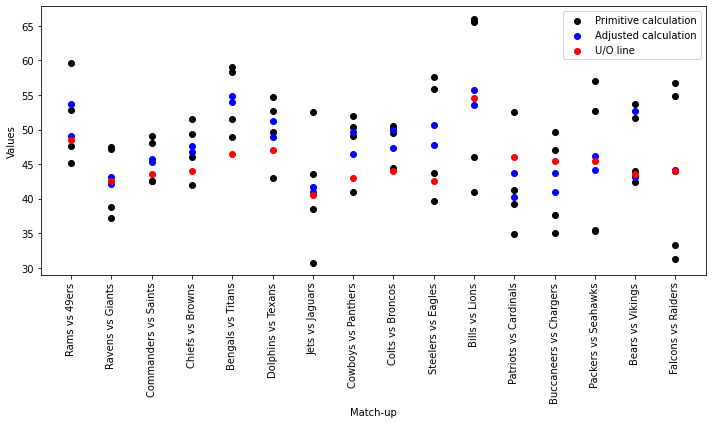

In [33]:
display_stats(over_unders15["stats"])

### Week 15 results
| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Bengals vs Titans     | 6   | 1   | Won    |
| Colts vs Broncos      | 6   | 0   | Push   |
| Steelers vs Eagles    | 4   | 2   | Lost   |
| Patriots vs Cardinals | -4  | 0   | Lost   |
| Cowboys vs Panthers   | 4   | 0   | Won    |
| Dolphins vs Texans    | 4   | 0   | Lost   |
| Chiefs vs Browns      | 4   | 0   | Lost   |

This week: 2 Won, 4 Lost, 1 Push  
This season: 30 Won, 32 Lost, 5 Push

# Week 16

In [34]:
new_scores15 = [
	['49ers', 'Rams', 6, 12],
	['Browns', 'Chiefs', 7, 21],
	['Titans', 'Bengals', 27, 37],
	['Saints', 'Commanders', 19, 20],
	['Giants', 'Ravens', 14, 35],
	['Panthers', 'Cowboys', 14, 30],
	['Jaguars', 'Jets', 25, 32],
	['Texans', 'Dolphins', 20, 12],
	['Broncos', 'Colts', 31, 13],
	['Lions', 'Bills', 42, 48],
	['Eagles', 'Steelers', 27, 13],
	['Cardinals', 'Patriots', 30, 17],
	['Chargers', 'Buccaneers', 17, 40],
	['Seahawks', 'Packers', 13, 30],
	['Vikings', 'Bears', 30, 12],
	['Raiders', 'Falcons', 9, 15]
]
update_points(new_scores15)

In [35]:
over_unders16 = {
	('Broncos', 'Chargers', 41.0): [],
	('Texans', 'Chiefs', 42.5): [],
	('Steelers', 'Ravens', 45.0): [],
	('Lions', 'Bears', 48.0): [],
	('Browns', 'Bengals', 47.0): [],
	('Eagles', 'Commanders', 45.5): [],
	('Rams', 'Jets', 46.5): [],
	('Cardinals', 'Panthers', 47.0): [],
	('Giants', 'Falcons', 42.0): [],
	('Titans', 'Colts', 42.5): [],
	('Vikings', 'Seahawks', 42.5): [],
	('Patriots', 'Bills', 46.5): [],
	('49ers', 'Dolphins', 44.5): [],
	('Jaguars', 'Raiders', 40.5): [],
	('Buccaneers', 'Cowboys', 48.0): [],
	('Saints', 'Packers', 42.5): []
}
agg_week16 = aggregate(over_unders16)
conf_list16 = compare_MAE(over_unders16['stats'])
combine_tuple_lists(conf_list16,agg_week16)

Patriots  vs  Bills
o/u score:  6
mae score:  4
---------
Browns  vs  Bengals
o/u score:  6
mae score:  1
---------
Broncos  vs  Chargers
o/u score:  6
mae score:  1
---------
Rams  vs  Jets
o/u score:  6
mae score:  0
---------
Lions  vs  Bears
o/u score:  5
mae score:  1
---------
Steelers  vs  Ravens
o/u score:  4
mae score:  0
---------
Titans  vs  Colts
o/u score:  2
mae score:  1
---------
Giants  vs  Falcons
o/u score:  -2
mae score:  1
---------
Buccaneers  vs  Cowboys
o/u score:  -2
mae score:  0
---------
49ers  vs  Dolphins
o/u score:  -2
mae score:  0
---------
Vikings  vs  Seahawks
o/u score:  2
mae score:  0
---------
Cardinals  vs  Panthers
o/u score:  -2
mae score:  0
---------
Texans  vs  Chiefs
o/u score:  -2
mae score:  0
---------
Jaguars  vs  Raiders
o/u score:  0
mae score:  1
---------
Saints  vs  Packers
o/u score:  0
mae score:  0
---------
Eagles  vs  Commanders
o/u score:  0
mae score:  0
---------


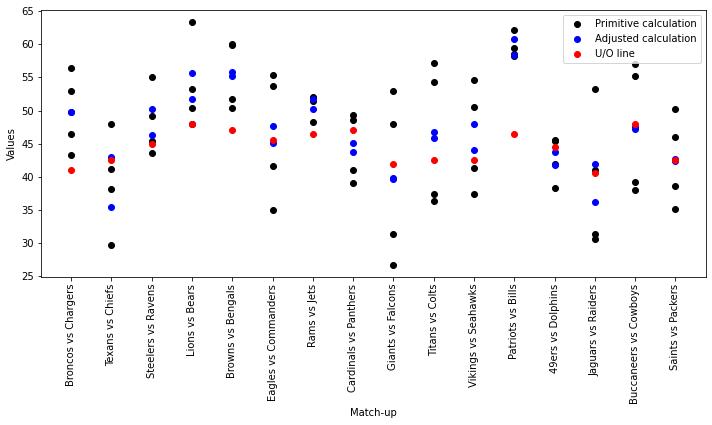

In [36]:
display_stats(over_unders16["stats"])

### Week 16 results
| Match                 | ou  | MAE | Result |
|-----------------------|-----|-----|--------|
| Patriots vs Bills     | 6   | 4   | Lost   |
| Browns vs Bengals     | 6   | 1   | Lost   |
| Broncos vs Chargers   | 6   | 1   | Won    |
| Rams vs Jets          | 6   | 0   | Lost   |
| Lions vs Bears        | 5   | 1   | Won    |
| Steelers vs Ravens    | 4   | 0   | Won    |

This week: 3 Won, 3 Lost, 0 Push  
This season: 33 Won, 35 Lost, 5 Push

# Week 17

In [37]:
new_scores16 = [
	['Chargers', 'Broncos', 34, 27],
	['Chiefs', 'Texans', 27, 19],
	['Ravens', 'Steelers', 34, 17],
	['Falcons', 'Giants', 34, 7],
	['Bears', 'Lions', 17, 34],
	['Bengals', 'Browns', 24, 6],
	['Colts', 'Titans', 38, 30],
	['Jets', 'Rams', 9, 19],
	['Commanders', 'Eagles', 36, 33],
	['Panthers', 'Cardinals', 36, 30],
	['Seahawks', 'Vikings', 24, 27],
	['Bills', 'Patriots', 24, 21],
	['Raiders', 'Jaguars', 19, 14],
	['Dolphins', '49ers', 29, 17],
	['Cowboys', 'Buccaneers', 26, 24],
	['Packers', 'Saints', 34, 0]
]
update_points(new_scores16)

In [38]:
over_unders17 = {
	('Chiefs', 'Steelers', 46.0): [],
	('Ravens', 'Texans', 47.0): [],
	('Seahawks', 'Bears', 42.5): [],
	('Chargers', 'Patriots', 42.5): [],
	('Broncos', 'Bengals', 49.5): [],
	('Cardinals', 'Rams', 47.5): [],
	('Jets', 'Bills', 47.0): [],
	('Colts', 'Giants', 40.5): [],
	('Panthers', 'Buccaneers', 48.5): [],
	('Cowboys', 'Eagles', 41.5): [],
	('Raiders', 'Saints', 38.0): [],
	('Titans', 'Jaguars', 39.5): [],
	('Dolphins', 'Browns', 39.5): [],
	('Packers', 'Vikings', 48.5): [],
	('Falcons', 'Commanders', 47.5): [],
	('Lions', '49ers', 50.5): []
}
agg_week17 = aggregate(over_unders17)
conf_list17 = compare_MAE(over_unders17['stats'])
combine_tuple_lists(conf_list17,agg_week17)

Jets  vs  Bills
o/u score:  6
mae score:  4
---------
Cowboys  vs  Eagles
o/u score:  6
mae score:  1
---------
Titans  vs  Jaguars
o/u score:  4
mae score:  0
---------
Chiefs  vs  Steelers
o/u score:  -3
mae score:  0
---------
Packers  vs  Vikings
o/u score:  2
mae score:  4
---------
Colts  vs  Giants
o/u score:  2
mae score:  2
---------
Raiders  vs  Saints
o/u score:  -2
mae score:  1
---------
Broncos  vs  Bengals
o/u score:  2
mae score:  1
---------
Chargers  vs  Patriots
o/u score:  2
mae score:  1
---------
Seahawks  vs  Bears
o/u score:  2
mae score:  1
---------
Lions  vs  49ers
o/u score:  -2
mae score:  0
---------
Falcons  vs  Commanders
o/u score:  2
mae score:  0
---------
Dolphins  vs  Browns
o/u score:  2
mae score:  0
---------
Panthers  vs  Buccaneers
o/u score:  2
mae score:  0
---------
Cardinals  vs  Rams
o/u score:  -2
mae score:  0
---------
Ravens  vs  Texans
o/u score:  -1
mae score:  0
---------


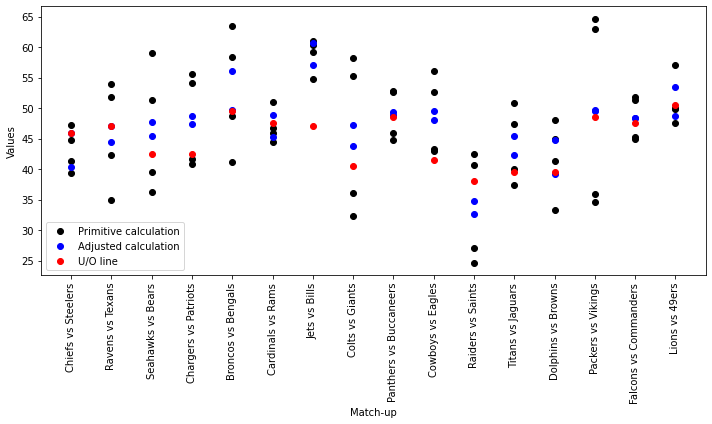

In [39]:
display_stats(over_unders17["stats"])

### Week 17 results
| Match                | ou  | MAE | Result |
|----------------------|-----|-----|--------|
| Jets vs Bills        | 6   | 4   | Won    |
| Cowboys vs Eagles    | 6   | 1   | Won    |
| Titans vs Jaguars    | 4   | 0   | Lost   |

This week: 2 Won, 1 Lost, 0 Push  
This season: 35 Won, 36 Lost, 5 Push

# Week 18

In [40]:
new_scores17 = [
	['Steelers', 'Chiefs', 10, 29],
	['Texans', 'Ravens', 2, 31],
	['Bears', 'Seahawks', 3, 6],
	['Patriots', 'Chargers', 7, 40],
	['Bengals', 'Broncos', 30, 24],
	['Rams', 'Cardinals', 13, 9],
	['Bills', 'Jets', 40, 14],
	['Saints', 'Raiders', 10, 25],
	['Giants', 'Colts', 45, 33],
	['Eagles', 'Cowboys', 41, 7],
	['Buccaneers', 'Panthers', 48, 14],
	['Jaguars', 'Titans', 20, 13],
	['Browns', 'Dolphins', 3, 20],
	['Vikings', 'Packers', 27, 25],
	['Commanders', 'Falcons', 30, 24],
	['49ers', 'Lions', 34, 40]
]
update_points(new_scores17)

In [41]:
over_unders18 = {
	('Browns', 'Ravens', 41.5): [],
	('Bengals', 'Steelers', 47.5): [],
	('Saints', 'Buccaneers', 43.5): [],
	('Bears', 'Packers', 41.5): [],
	('Bills', 'Patriots', 36.5): [],
	('Panthers', 'Falcons', 48.5): [],
	('Commanders', 'Cowboys', 43.5): [],
	('Giants', 'Eagles', 36.5): [],
	('Texans', 'Titans', 36.5): [],
	('Jaguars', 'Colts', 43.5): [],
	('Chiefs', 'Broncos', 40.5): [],
	('Chargers', 'Raiders', 41.5): [],
	('Dolphins', 'Jets', 38.5): [],
	('Seahawks', 'Rams', 38.5): [],
	('49ers', 'Cardinals', 42.5): [],
	('Vikings', 'Lions', 56.5): []
}
agg_week18 = aggregate(over_unders18)
conf_list18 = compare_MAE(over_unders18['stats'])
combine_tuple_lists(conf_list18,agg_week18)

Bills  vs  Patriots
o/u score:  6
mae score:  6
---------
Giants  vs  Eagles
o/u score:  6
mae score:  5
---------
Jaguars  vs  Colts
o/u score:  6
mae score:  1
---------
Dolphins  vs  Jets
o/u score:  6
mae score:  0
---------
Commanders  vs  Cowboys
o/u score:  6
mae score:  0
---------
Texans  vs  Titans
o/u score:  4
mae score:  2
---------
Chiefs  vs  Broncos
o/u score:  4
mae score:  1
---------
49ers  vs  Cardinals
o/u score:  4
mae score:  0
---------
Browns  vs  Ravens
o/u score:  -3
mae score:  0
---------
Vikings  vs  Lions
o/u score:  2
mae score:  0
---------
Seahawks  vs  Rams
o/u score:  -2
mae score:  0
---------
Saints  vs  Buccaneers
o/u score:  2
mae score:  0
---------
Bengals  vs  Steelers
o/u score:  2
mae score:  0
---------
Panthers  vs  Falcons
o/u score:  -1
mae score:  0
---------
Chargers  vs  Raiders
o/u score:  0
mae score:  0
---------
Bears  vs  Packers
o/u score:  0
mae score:  0
---------


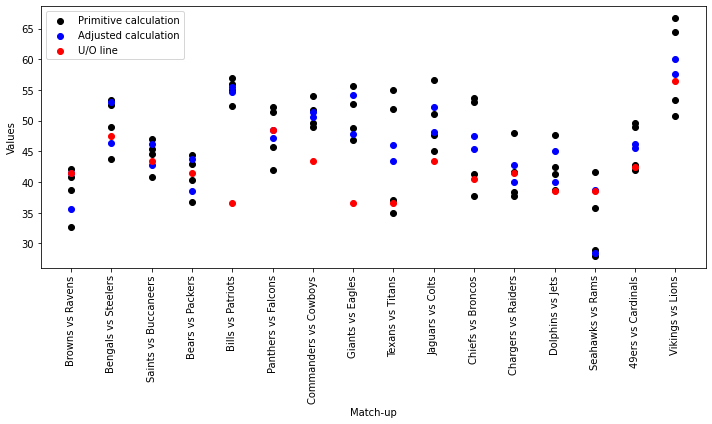

In [42]:
display_stats(over_unders18["stats"])

### Week 18 results
| Match                   | ou  | MAE | Result |
|-------------------------|-----|-----|--------|
| Bills vs Patriots       | 6   | 6   | Won    |
| Giants vs Eagles        | 6   | 5   | Lost   |
| Jaguars vs Colts        | 6   | 1   | Won    |
| Dolphins vs Jets        | 6   | 0   | Won    |
| Commanders vs Cowboys   | 6   | 0   | Lost   |
| Texans vs Titans        | 4   | 2   | Won    |
| Chiefs vs Broncos       | 4   | 1   | Lost   |
| 49ers vs Cardinals      | 4   | 0   | Won    |

This week: 5 Won, 3 Lost, 0 Push  
This season: 40 Won, 39 Lost, 5 Push